In [39]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [40]:
data_train = pd.read_csv('/content/drive/MyDrive/Datasets/Lab3/metacritic_game_user_comments.csv')
data_test = pd.read_csv('/content/drive/MyDrive/Datasets/Lab3/metacritic_game_user_comments.csv')

In [41]:
data_train

,Unnamed: 0,Title,Platform,Userscore,Comment,Username
0,0,The Legend of Zelda: Ocarina of Time,Nintendo64,10,"Everything in OoT is so near at perfection, it...",SirCaestus
1,1,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I won't bore you with what everyone is already...,Kaistlin
2,2,The Legend of Zelda: Ocarina of Time,Nintendo64,10,Anyone who gives the masterpiece below a 7 or ...,Jacody
3,3,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I'm one of those people who think that this is...,doodlerman
4,4,The Legend of Zelda: Ocarina of Time,Nintendo64,10,This game is the highest rated game on Metacr...,StevenA
...,...,...,...,...,...,...
283978,283978,Etrian Odyssey Untold: The Millennium Girl,3DS,7,"Extremely similar to EO:4, which obviously isn...",RileyWRussell
283979,283979,Etrian Odyssey Untold: The Millennium Girl,3DS,0,Typical overrated Atlus trash. A game i should...,TemplarGR
283980,283980,Etrian Odyssey Untold: The Millennium Girl,3DS,9,While I find the story mode to have annoying c...,midipon
283981,283981,Etrian Odyssey Untold: The Millennium Girl,3DS,8,"Pretty good, but it certainly lacks the visual...",night4


In [42]:
data_test

,Unnamed: 0,Title,Platform,Userscore,Comment,Username
0,0,The Legend of Zelda: Ocarina of Time,Nintendo64,10,"Everything in OoT is so near at perfection, it...",SirCaestus
1,1,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I won't bore you with what everyone is already...,Kaistlin
2,2,The Legend of Zelda: Ocarina of Time,Nintendo64,10,Anyone who gives the masterpiece below a 7 or ...,Jacody
3,3,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I'm one of those people who think that this is...,doodlerman
4,4,The Legend of Zelda: Ocarina of Time,Nintendo64,10,This game is the highest rated game on Metacr...,StevenA
...,...,...,...,...,...,...
283978,283978,Etrian Odyssey Untold: The Millennium Girl,3DS,7,"Extremely similar to EO:4, which obviously isn...",RileyWRussell
283979,283979,Etrian Odyssey Untold: The Millennium Girl,3DS,0,Typical overrated Atlus trash. A game i should...,TemplarGR
283980,283980,Etrian Odyssey Untold: The Millennium Girl,3DS,9,While I find the story mode to have annoying c...,midipon
283981,283981,Etrian Odyssey Untold: The Millennium Girl,3DS,8,"Pretty good, but it certainly lacks the visual...",night4


In [43]:
from sklearn.preprocessing import LabelEncoder

cols = data_train.columns.difference(['Userscore'])

le = LabelEncoder()

data_train[cols] = data_train[cols].apply(le.fit_transform)

In [44]:
from sklearn.preprocessing import LabelEncoder

cols = data_test.columns.difference(['Userscore'])

le = LabelEncoder()

data_test[cols] = data_test[cols].apply(le.fit_transform)

In [45]:
is_number = np.vectorize(lambda x: np.issubdtype(x, np.number))
train_mask = is_number(data_train.dtypes)
test_mask = is_number(data_train.dtypes)

print('No gaps' if pd.api.types.is_numeric_dtype(data_train) and pd.api.types.is_numeric_dtype(data_test) else 'Replace some data in column', data_train.columns[~train_mask], data_test.columns[~test_mask])


Replace some data in column Index([], dtype='object') Index([], dtype='object')


Replace data that first column will be a Class data

In [46]:
data_train = data_train[['Userscore'] + [x for x in data_train.columns if x != 'Userscore']]
data_test = data_test[['Userscore'] + [x for x in data_test.columns if x != 'Userscore']]

Separate data for their classes

In [47]:
train_normal = data_train.loc[data_train['Userscore'] == 'NORMAL']
train_slow = data_train.loc[data_train['Userscore'] == 'SLOW']
train_aggressive = data_train.loc[data_train['Userscore'] == 'AGGRESSIVE']

test_normal = data_test.loc[data_test['Userscore'] == 'NORMAL']
test_slow = data_test.loc[data_test['Userscore'] == 'SLOW']
test_aggressive = data_test.loc[data_test['Userscore'] == 'AGGRESSIVE']

Delete some data in swiching mode period

In [48]:
Trash = 10

train_slow = train_slow.iloc[Trash:]
train_slow = train_slow.iloc[:-Trash]

test_slow = test_slow.iloc[Trash:]
test_slow = test_slow.iloc[:-Trash]

train_normal = train_normal.iloc[Trash:]
train_normal = train_normal.iloc[:-Trash]

test_normal = test_normal.iloc[Trash:]
test_normal = test_normal.iloc[:-Trash]

train_aggressive = train_aggressive.iloc[Trash:]
train_aggressive = train_aggressive.iloc[:-Trash]

test_aggressive = test_aggressive.iloc[Trash:]
test_aggressive = test_aggressive.iloc[:-Trash]

In [49]:
data_train.describe()

,Userscore,Unnamed: 0,Title,Platform,Comment,Username
count,283983.000000,283983.000000,283983.000000,283983.000000,283983.000000,283983.000000
mean,7.618308,141991.000000,1037.974037,9.444745,138774.223770,65683.292028
std,3.131767,81978.975085,693.306698,4.502395,80175.239376,38506.358806
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,70995.500000,421.000000,6.000000,69422.500000,32653.500000
50%,9.000000,141991.000000,884.000000,9.000000,138721.000000,65444.000000
75%,10.000000,212986.500000,1713.000000,11.000000,208144.500000,98651.000000
max,10.000000,283982.000000,2324.000000,19.000000,277706.000000,133664.000000


Separating for traning and test dataset

In [50]:
X_train = data_train.iloc[:, 1:7]
Y_train = data_train.iloc[:, 0]
X_test = data_test.iloc[:, 1:7]
Y_test = data_test.iloc[:, 0]

In [51]:
labelencoder_X = LabelEncoder()
labelencoder_Y = LabelEncoder()

Y_train = labelencoder_Y.fit_transform(Y_train)
Y_test = labelencoder_Y.transform(Y_test)

In [52]:
from sklearn.utils import shuffle
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)
X_test, Y_test = shuffle(X_test, Y_test, random_state=42)

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [54]:
Y_train

array([ 8,  0,  5, ..., 10,  8,  1])

Principal component analysis

In [55]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_std = scaler.fit_transform(X_train)

pca = PCA()
X_pca = pca.fit_transform(X_std)

In [56]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

In [ ]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [58]:
y = Y_train

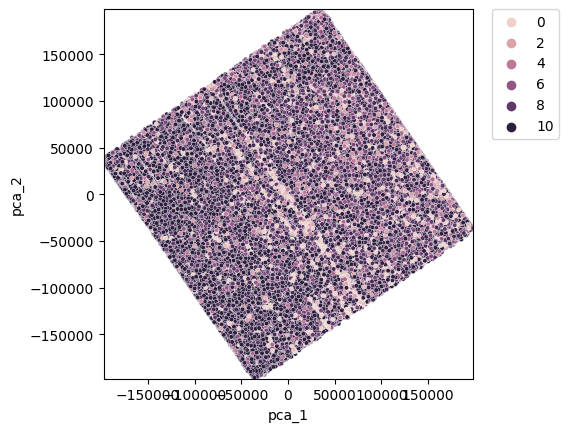

In [59]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train)

pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax,s=10)
lim = (pca_result.min(), pca_result.max())
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

t-distributed Stochastic Neighbor Embedding

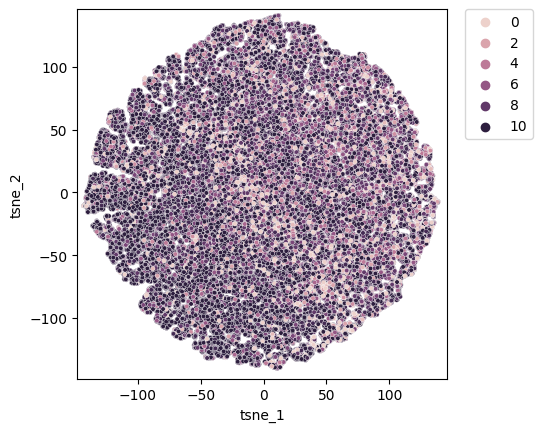

In [60]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X_train)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

Quantization

In [65]:
from time import time
import cv2
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
n_colors = 8096
# Make sure the file path is correct and accessible
chinawall = cv2.imread("/content/drive/MyDrive/Datasets/image.jpg", cv2.IMREAD_UNCHANGED)

# Check if the image is loaded correctly
if chinawall is None:
    raise ValueError("The image has not been loaded. Check the file path.")

chinawall = np.array(chinawall, dtype=np.float64) / 255
unique_colors = len(np.unique(chinawall))


In [66]:
w, h, d = original_shape = tuple(chinawall.shape)
image_array = np.reshape(chinawall, (w * h, d))

In [68]:
n_samples = min(w * h, 10_000)
image_array_sample = shuffle(image_array, random_state=0, n_samples=n_samples)
kmeans = KMeans(n_clusters=n_colors, n_init="auto", random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)
codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

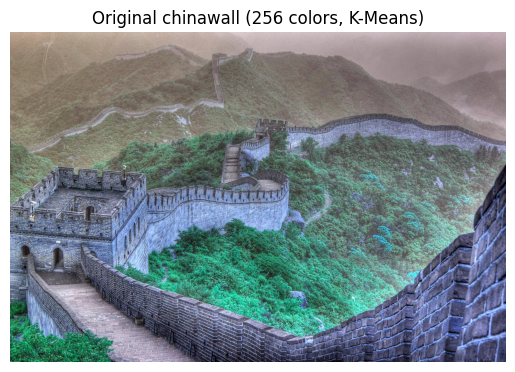

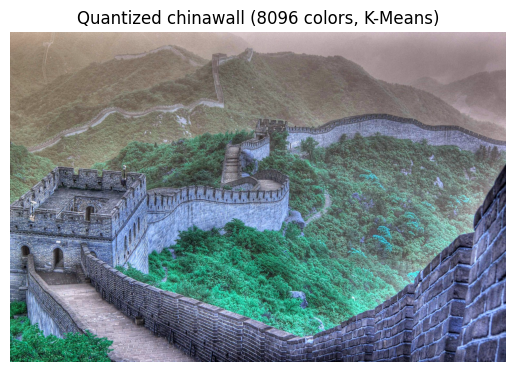

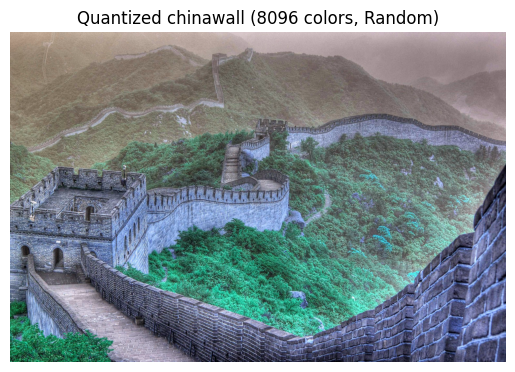

In [70]:
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title(f"Original chinawall ({unique_colors} colors, K-Means)")
plt.imshow(chinawall)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized chinawall ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized chinawall ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

Обробка та класифікація текстових даних

In [4]:
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd

text_data = pd.read_csv('/content/drive/MyDrive/Datasets/Lab3/metacritic_game_user_comments.csv')
text_data.info()
text_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283983 entries, 0 to 283982
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  283983 non-null  int64 
 1   Title       283983 non-null  object
 2   Platform    283983 non-null  object
 3   Userscore   283983 non-null  int64 
 4   Comment     283960 non-null  object
 5   Username    283980 non-null  object
dtypes: int64(2), object(4)
memory usage: 13.0+ MB


,Unnamed: 0,Title,Platform,Userscore,Comment,Username
0,0,The Legend of Zelda: Ocarina of Time,Nintendo64,10,"Everything in OoT is so near at perfection, it...",SirCaestus
1,1,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I won't bore you with what everyone is already...,Kaistlin
2,2,The Legend of Zelda: Ocarina of Time,Nintendo64,10,Anyone who gives the masterpiece below a 7 or ...,Jacody
3,3,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I'm one of those people who think that this is...,doodlerman
4,4,The Legend of Zelda: Ocarina of Time,Nintendo64,10,This game is the highest rated game on Metacr...,StevenA
...,...,...,...,...,...,...
283978,283978,Etrian Odyssey Untold: The Millennium Girl,3DS,7,"Extremely similar to EO:4, which obviously isn...",RileyWRussell
283979,283979,Etrian Odyssey Untold: The Millennium Girl,3DS,0,Typical overrated Atlus trash. A game i should...,TemplarGR
283980,283980,Etrian Odyssey Untold: The Millennium Girl,3DS,9,While I find the story mode to have annoying c...,midipon
283981,283981,Etrian Odyssey Untold: The Millennium Girl,3DS,8,"Pretty good, but it certainly lacks the visual...",night4


In [7]:
text_data['Title'][0]

'The Legend of Zelda: Ocarina of Time'

In [8]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words("english")

# example of text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub("@\S+", " ", text)
    text = re.sub("https*\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub("\d", " ", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}',' ', text)
    text = ' '.join([ lemmatizer.lemmatize(word) for word in text.split(' ') if word not in stop_words])
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
# Preprocess
text_data['Title'] = text_data['Title'].apply(clean_text)

In [16]:
# Save
text_data = text_data[text_data['Title'].str.count('\s+').gt(1)]
text_data.to_json('Processed_Lemmatization_emotions.json', orient='records')
text_data = pd.read_json('Processed_Lemmatization_emotions.json')

In [18]:
corpus = text_data['Title'].to_list()
corpus

['legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend zelda ocarina time',
 'legend z

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(use_idf=True,
                     max_df=0.035, # ignore terms that have a document frequency strictly higher than the given threshold
                     smooth_idf=True)

tv.fit(text_data['Title'])

stop_words = list(tv.stop_words_)

# Safely remove 'time' and 'ocarina' if they exist in the list
for word in ['time', 'ocarina']:
    if word in stop_words:
        stop_words.remove(word)

In [22]:
def remove_stop_words(text, stop_words=stop_words):
    text = ' '.join([ word for word in text.split(' ') if word not in stop_words])
    return text

In [23]:
# Preprocess
text_data_copy = text_data.copy()
text_data_copy['Title'] = text_data_copy['Title'].apply(remove_stop_words,stop_words=stop_words)

In [24]:
text_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170510 entries, 0 to 170509
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  170510 non-null  int64 
 1   Title       170510 non-null  object
 2   Platform    170510 non-null  object
 3   Userscore   170510 non-null  int64 
 4   Comment     170494 non-null  object
 5   Username    170508 non-null  object
dtypes: int64(2), object(4)
memory usage: 7.8+ MB


In [25]:
text_data_copy = text_data_copy[text_data_copy['Title'].str.count('\s+').gt(1)]
text_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124173 entries, 889 to 170509
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  124173 non-null  int64 
 1   Title       124173 non-null  object
 2   Platform    124173 non-null  object
 3   Userscore   124173 non-null  int64 
 4   Comment     124163 non-null  object
 5   Username    124171 non-null  object
dtypes: int64(2), object(4)
memory usage: 6.6+ MB


In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def visualize(label, dataframe, style='RdYlGn'):
    text = ' '.join(dataframe['text'])  # Make sure to replace 'text' with the actual column name

    # Generate a word cloud image
    wordcloud = WordCloud(width=600, height=400, background_color='white', colormap=style).generate(text)

    # Display the generated image
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


In [29]:
set(text_data_copy['Platform'].to_list())

{'3DS',
 'DS',
 'Dreamcast',
 'GameBoyAdvance',
 'GameCube',
 'Nintendo64',
 'PC',
 'PSP',
 'PlayStation',
 'PlayStation2',
 'PlayStation3',
 'PlayStation4',
 'PlayStationVita',
 'Switch',
 'Wii',
 'WiiU',
 'Xbox',
 'Xbox360',
 'XboxOne',
 'not specified'}

In [34]:
visualize('Dreamcast', text_data, style='cool_r')
visualize('3DS', text_data, style='cool_r')

KeyError: ignored

In [35]:
visualize('Nintendo64', text_data_copy, style = 'cool_r')
visualize('3DS', text_data_copy, style = 'cool_r')

KeyError: ignored

Prediction

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_copy['Sentence'], df_copy['Emotion'], test_size=0.25, random_state=42)


In [ ]:
cv = CountVectorizer()

In [ ]:
X_tr_train = cv.fit_transform(X_train)
X_tr_test = cv.transform(X_test)

In [ ]:
clf = MultinomialNB(alpha=0.1)
clf.fit(X_tr_train, y_train)
predicted = clf.predict(X_tr_test)

print(classification_report(y_test.tolist(), predicted))

In [ ]:
clf = GradientBoostingClassifier()
clf.fit(X_tr_train, y_train)
predicted = clf.predict(X_tr_test)

print(classification_report(y_test.tolist(), predicted))

In [ ]:
tv = TfidfVectorizer(use_idf=True,
                    #ngram_range=(1,2),
                    min_df=0.0015, #  activating this parameter lead to a better training of the NB and worse GradBoost
                    max_df=0.0085,
                    smooth_idf=True)

In [ ]:
X_tv_train = tv.fit_transform(X_train)
X_tv_test = tv.transform(X_test)

In [ ]:
clf = MultinomialNB(alpha=0.1)
clf.fit(X_tv_train, y_train)
predicted = clf.predict(X_tv_test)

print(classification_report(y_test.tolist(), predicted))

In [ ]:
clf = GradientBoostingClassifier()
clf.fit(X_tv_train, y_train)
predicted = clf.predict(X_tv_test)

print(classification_report(y_test.tolist(), predicted))